Now we try collaborative filtering using a and b, the user and movie specific biases respectively, as
well as a global bias to the ratings, mu.

I.e.: Yij = mu + Ui.T * Vj + ai + bj

In [1]:
import matplotlib.pyplot as plt
from method2utils import train_model, get_err
import pickle
import numpy as np

In [2]:
# Import the data
Y_train = pickle.load((open("data/y_train.p", "rb")))
Y_test = pickle.load((open("data/y_test.p", "rb")))

num_users = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int)
num_movies = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int)

In [3]:
# Parameters fed to the model
regularizations = np.logspace(-4, 1, 6)
eta = 0.02
K = 20

# To hold error values
E_in = []
E_out = []
for reg in regularizations:
    print("Using regularization lambda = " + str(reg))
    U, V, a, b, mu, e_in = \
        train_model(num_users, num_movies, K, eta, reg, Y_train)
    E_in.append(e_in)
    e_out = get_err(U, V, Y_test, a, b, mu)
    E_out.append(e_out)
    print("Final non regularized MSE for training set was " + str(e_in))
    print("Final non regularized MSE for test set was " + str(e_out))
    print("")
    

Using regularization lambda = 0.0001
Epoch 1, E_in (regularized MSE): 0.44257543672237354
Epoch 2, E_in (regularized MSE): 0.3912204441412097
Epoch 3, E_in (regularized MSE): 0.35687748884163384
Epoch 4, E_in (regularized MSE): 0.32756722718085785
Epoch 5, E_in (regularized MSE): 0.3033023792014216
Epoch 6, E_in (regularized MSE): 0.2820894871788943
Epoch 7, E_in (regularized MSE): 0.26496794527835243
Epoch 8, E_in (regularized MSE): 0.25054369146914446
Epoch 9, E_in (regularized MSE): 0.23893169302767733
Epoch 10, E_in (regularized MSE): 0.22888767146722921
Epoch 11, E_in (regularized MSE): 0.2203787990307692
Epoch 12, E_in (regularized MSE): 0.21324388259292634
Epoch 13, E_in (regularized MSE): 0.20707642963241774
Epoch 14, E_in (regularized MSE): 0.2016293141387564
Epoch 15, E_in (regularized MSE): 0.19727638062218195
Epoch 16, E_in (regularized MSE): 0.19307823530199195
Epoch 17, E_in (regularized MSE): 0.18948732396696344
Epoch 18, E_in (regularized MSE): 0.18662336997862525
Epoch

Epoch 22, E_in (regularized MSE): 0.17723544465016255
Epoch 23, E_in (regularized MSE): 0.17514789498388142
Epoch 24, E_in (regularized MSE): 0.17346814103305566
Epoch 25, E_in (regularized MSE): 0.17150081461659414
Epoch 26, E_in (regularized MSE): 0.16987151768033149
Epoch 27, E_in (regularized MSE): 0.1686046103704329
Epoch 28, E_in (regularized MSE): 0.16689251046893216
Epoch 29, E_in (regularized MSE): 0.1655873221457183
Epoch 30, E_in (regularized MSE): 0.16451298673716086
Epoch 31, E_in (regularized MSE): 0.16357012264052734
Epoch 32, E_in (regularized MSE): 0.16235368981591858
Epoch 33, E_in (regularized MSE): 0.16121565537465668
Epoch 34, E_in (regularized MSE): 0.1604195989514161
Epoch 35, E_in (regularized MSE): 0.15952469933276398
Epoch 36, E_in (regularized MSE): 0.15869531605350848
Epoch 37, E_in (regularized MSE): 0.15759906312167282
Epoch 38, E_in (regularized MSE): 0.15693544660416528
Epoch 39, E_in (regularized MSE): 0.15615160134403394
Epoch 40, E_in (regularized MSE

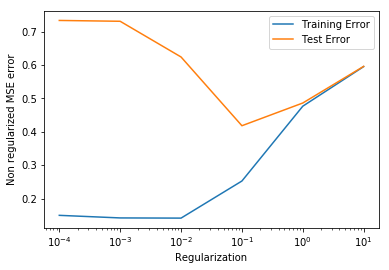

In [4]:
plt.plot(regularizations, E_in, label = "Training Error")
plt.plot(regularizations, E_out, label = "Test Error")
plt.xscale("log")
plt.xlabel("Regularization")
plt.ylabel("Non regularized MSE error")
plt.legend()
plt.show()

Using reg = 0.1 resulted in the best test error for this model, which was 0.418